In [1]:
import numpy as np
from numpy import pi
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors

In [2]:
3%2

1

In [3]:
np.around(1.5)

2.0

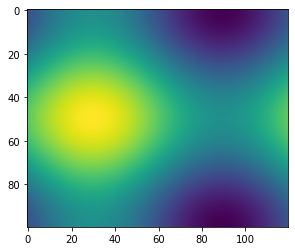

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = ax.imshow(f(x, y), animated=True)
    if i == 0:
        ax.imshow(f(x, y))  # show an initial one first
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# To save the animation, use e.g.
#
ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

In [5]:
HTML(ani.to_html5_video())

In [4]:
from IPython.display import HTML

In [2]:
g=9.81
rho=1.225
Cd=0.5
M=8
R=0.12
A=4*pi*R**2
alpha=rho*Cd*A/2
beta=10*alpha/M

time_vec=np.linspace(0, 3,100)
yvec=(0,0,0,10,10,10)

def trajectory(time,yvec):
    vx=yvec[3]
    vy=yvec[4]
    vz=yvec[5]
    ax=-beta*vx*((vx**2)+(vy**2)+(vz**2))**0.5
    ay=-beta*vy*((vx**2)+(vy**2)+(vz**2))**0.5
    az=-g-beta*vz*((vx**2)+(vy**2)+(vz**2))**0.5
    return (vx,vy,vz,ax,ay,az)

def ground(time,yvec):
    return yvec[2]

ground.terminal = True
ground.direction = -1

yarr=solve_ivp(trajectory,[0,3],yvec,method='RK45',dense_output=True,events=ground)

In [3]:
t_end=yarr.t_events

time_vec=np.linspace(0, t_end[0][0],100)

In [4]:
yarr_new=yarr.sol(time_vec)

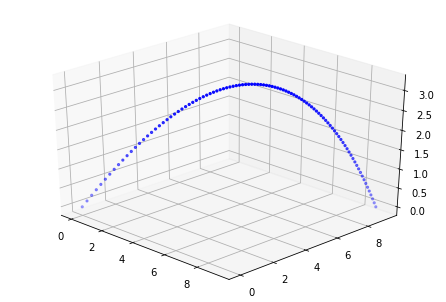

In [5]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(yarr_new[0,:], yarr_new[1,:], yarr_new[2,:], c='b', marker='.')
ax.view_init(30, -45)

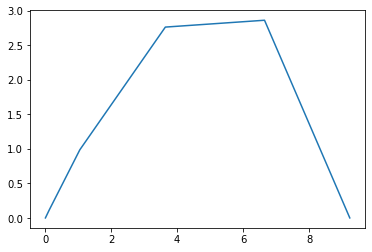

In [6]:
plt.plot(yarr.y[0,:],yarr.y[2,:])

In [7]:
g=9.81
rho=1.225
Cd=0.5
M=8
R=0.12
A=4*pi*R**2
alpha=rho*Cd*A/2
beta=10*alpha/M

time_vec=np.linspace(0, 1.5, 1000)
yvec=(0,0,0,10,10,10)

def trajectory(yvec,time):
    vx=yvec[3]
    vy=yvec[4]
    vz=yvec[5]
    ax=-beta*vx*((vx**2)+(vy**2)+(vz**2))**0.5
    ay=-beta*vy*((vx**2)+(vy**2)+(vz**2))**0.5
    az=-g-beta*vz*((vx**2)+(vy**2)+(vz**2))**0.5
    return (vx,vy,vz,ax,ay,az)

yarr=odeint(trajectory,yvec,time_vec)

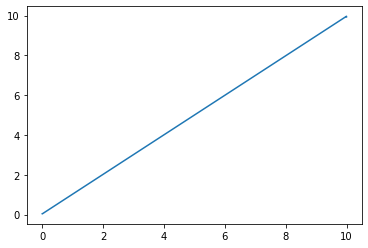

In [8]:
plt.plot(yarr[0,:],yarr[2,:])

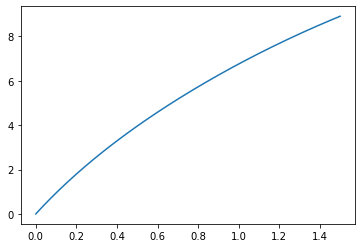

In [9]:
plt.plot(time_vec,yarr[:,0])

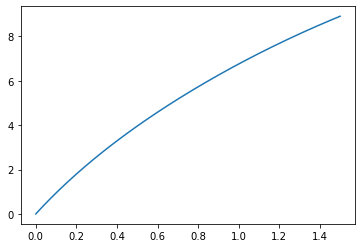

In [10]:
plt.plot(time_vec,yarr[:,1])

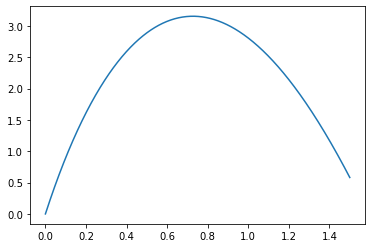

In [11]:
plt.plot(time_vec,yarr[:,2])

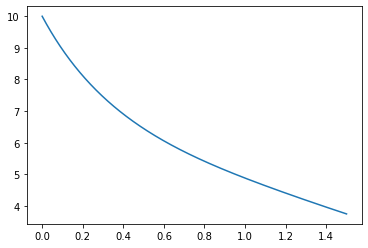

In [12]:
plt.plot(time_vec,yarr[:,3])

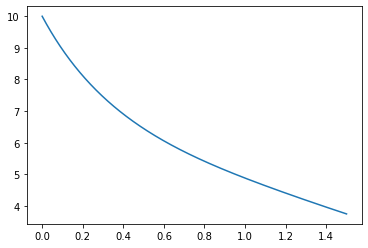

In [13]:
plt.plot(time_vec,yarr[:,4])

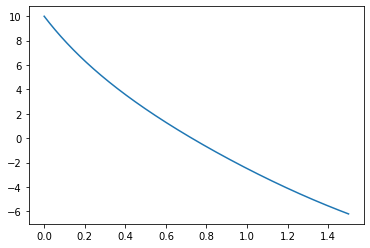

In [14]:
plt.plot(time_vec,yarr[:,5])

In [15]:
g=9.81

time_vec=np.linspace(0, 100, 1000)
yvec=(0,0,0,100,0,500)

def trajectory(yvec,time):
    #xi=yvec[0]
    #yi=yvec[1]
    #zi=yvec[2]
    vxi=yvec[3]
    vyi=yvec[4]
    vzi=yvec[5]
    ax=0
    ay=0.1*g
    az=-g
    
    return (vxi,vyi,vzi,ax,ay,az)

yarr=odeint(trajectory,yvec,time_vec)

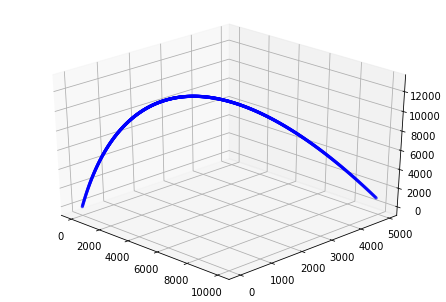

In [16]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(yarr[:,0], yarr[:,1], yarr[:,2], c='b', marker='.')
ax.view_init(30, -45)

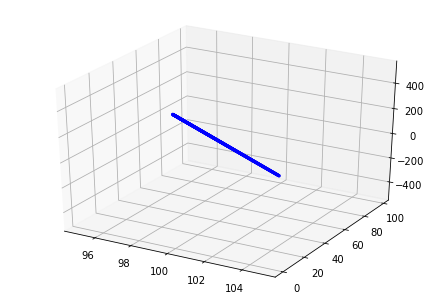

In [17]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(yarr[:,3], yarr[:,4], yarr[:,5], c='b', marker='.')
ax.view_init(30, -60)

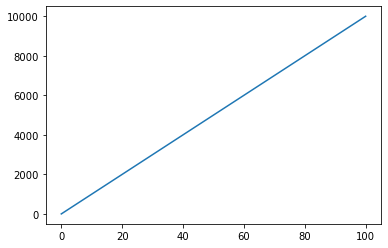

In [18]:
plt.plot(time_vec,yarr[:,0])

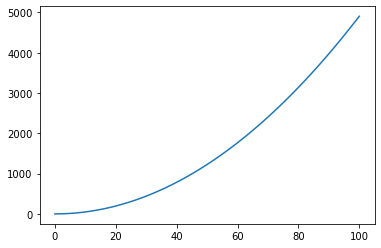

In [19]:
plt.plot(time_vec,yarr[:,1])

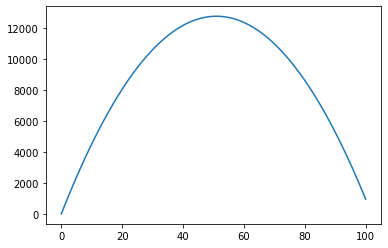

In [20]:
plt.plot(time_vec,yarr[:,2])

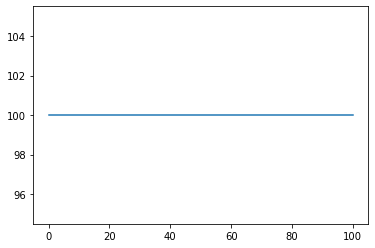

In [21]:
plt.plot(time_vec,yarr[:,3])

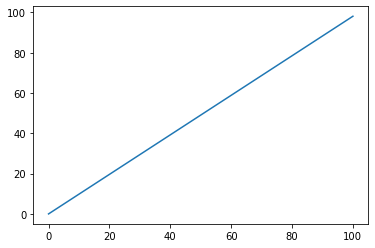

In [22]:
plt.plot(time_vec,yarr[:,4])

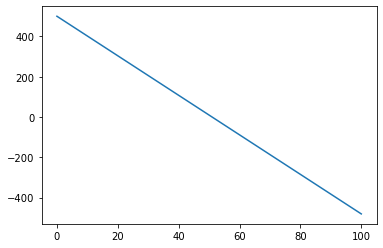

In [23]:
plt.plot(time_vec,yarr[:,5])

In [24]:
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

b = 0.25
c = 5.0

y0 = [np.pi - 0.1, 0.0]
t = np.linspace(0, 100, 1001)

sol = odeint(pend, y0, t, args=(b, c))

# scipy.integrate.odeint

In [25]:
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

b = 0.25
c = 5.0

y0 = [np.pi - 0.1, 0.0]
t = np.linspace(0, 100, 1001)

sol = odeint(pend, y0, t, args=(b, c))

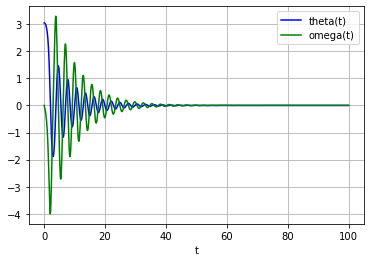

In [26]:
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

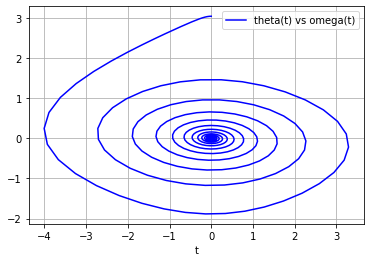

In [27]:
plt.plot(sol[:, 1], sol[:, 0], 'b', label='theta(t) vs omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

# scipy.integrate.solve_ivp

In [28]:
def exponential_decay(t, y): 
    return -0.5 * y

sol = solve_ivp(exponential_decay, [0, 10], [2, 4, 8])
print(sol.t)
print(sol.y)
sol = solve_ivp(exponential_decay, [0, 10], [2, 4, 8],
                t_eval=[0, 1, 2, 4, 10])
print(sol.t)
print(sol.y)

def upward_cannon(t, y): 
    return [y[1], -0.5]
def hit_ground(t, y): 
    return y[0]

hit_ground.terminal = True
hit_ground.direction = -1
sol = solve_ivp(upward_cannon, [0, 100], [0, 10], events=hit_ground)
print(sol.t_events)
print(sol.t)

def apex(t, y): 
    return y[1]

sol = solve_ivp(upward_cannon, [0, 100], [0, 10],
                events=(hit_ground, apex), dense_output=True)
print(sol.t_events)
print(sol.t)
print(sol.sol(sol.t_events[1][0]))
print(sol.y_events)

def lotkavolterra(t, z, a, b, c, d):
    x, y = z
    return [a*x - b*x*y, -c*y + d*x*y]

sol = solve_ivp(lotkavolterra, [0, 15], [10, 5], args=(1.5, 1, 3, 1),
                dense_output=True)

[ 0.          0.11487653  1.26364188  3.06061781  4.81611105  6.57445806
  8.33328988 10.        ]
[[2.         1.88836035 1.06327177 0.43319312 0.18017253 0.07483045
  0.03107158 0.01350781]
 [4.         3.7767207  2.12654355 0.86638624 0.36034507 0.14966091
  0.06214316 0.02701561]
 [8.         7.5534414  4.25308709 1.73277247 0.72069014 0.29932181
  0.12428631 0.05403123]]
[ 0  1  2  4 10]
[[2.         1.21305369 0.73534021 0.27069123 0.01350781]
 [4.         2.42610739 1.47068043 0.54138247 0.02701561]
 [8.         4.85221478 2.94136085 1.08276494 0.05403123]]
[array([40.])]
[0.00000000e+00 9.99900010e-05 1.09989001e-03 1.10988901e-02
 1.11088891e-01 1.11098890e+00 1.11099890e+01 4.00000000e+01]
[array([40.]), array([20.])]
[0.00000000e+00 9.99900010e-05 1.09989001e-03 1.10988901e-02
 1.11088891e-01 1.11098890e+00 1.11099890e+01 4.00000000e+01]
[100.   0.]
[array([[-1.42108547e-14, -1.00000000e+01]]), array([[100.,   0.]])]


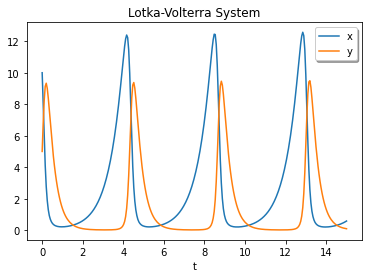

In [29]:
t = np.linspace(0, 15, 300)
z = sol.sol(t)

plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['x', 'y'], shadow=True)
plt.title('Lotka-Volterra System')
plt.show()

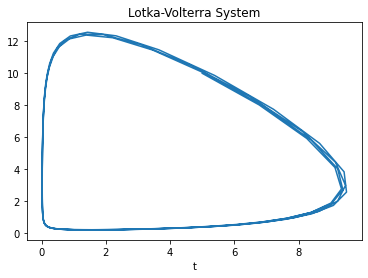

In [30]:
t = np.linspace(0, 15, 300)
z = sol.sol(t)

plt.plot(z[1], z[0])
plt.xlabel('t')
#plt.legend(['x', 'y'], shadow=True)
plt.title('Lotka-Volterra System')
plt.show()

# Github

In [31]:
alpha=0.1
omega=2

def calc_deri(yvec,time):#, alpha,omega):
    return (yvec[1],-alpha*omega*yvec[1]-omega**2*yvec[0])

time_vec=np.linspace(0, 100, 1000)
yinit=(1, 0)
yarr=odeint(calc_deri,yinit,time_vec)#,args=(alpha,omega))

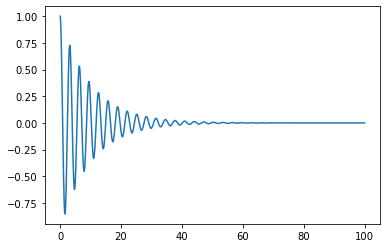

In [32]:
plt.plot(time_vec,yarr[:,0])

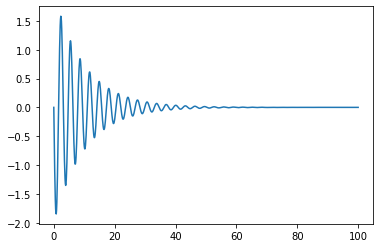

In [33]:
plt.plot(time_vec,yarr[:,1])

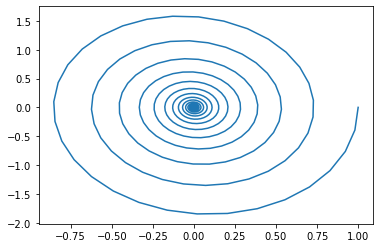

In [34]:
plt.plot(yarr[:,0],yarr[:,1])

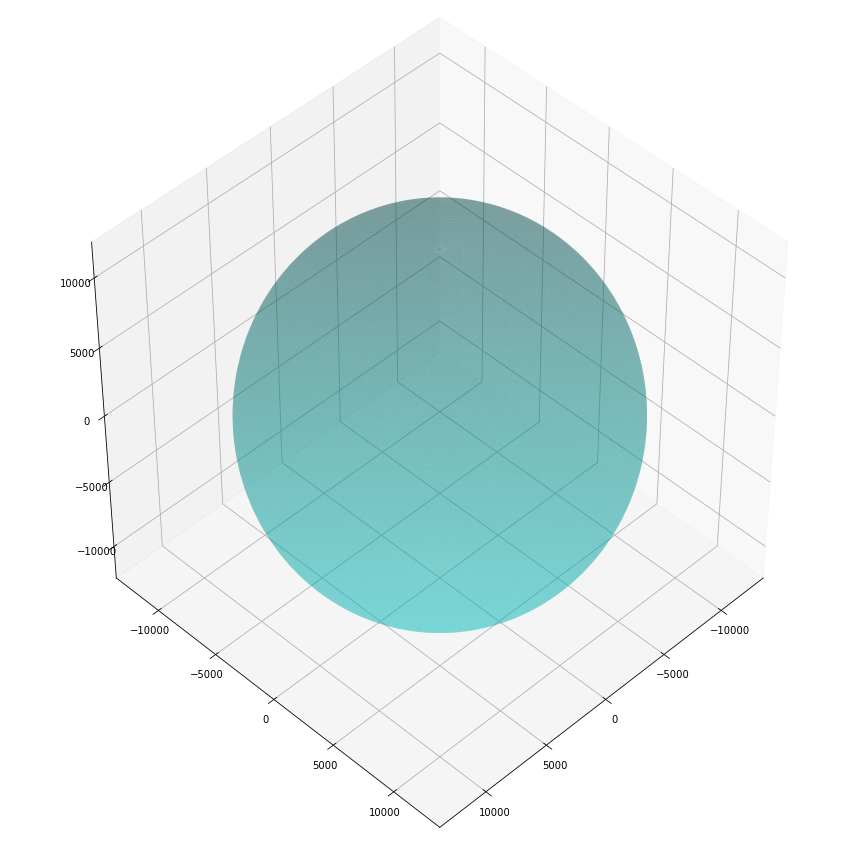

In [35]:
# Create a sphere
r = 12000
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

#Set colours and render
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(
    x, y, z,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)

#ax.set_xlim([-1,1])
#ax.set_ylim([-1,1])
#ax.set_zlim([-1,1])
plt.tight_layout()
ax.view_init(45, 45)
plt.show()